In [1]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt

# Theme, style, context, palette

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sinplot(ax, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        ax.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

fig, ax = plt.subplots()
sinplot(ax)

sns.set_theme()

fig, ax = plt.subplots()
sinplot(ax)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
x, y = np.arange(20).reshape(2, 10)

# matplotlib
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("matplotlib")

# seaborn
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("darkgrid")
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("whitegrid")
with sns.axes_style("dark"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("dark")
with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("white")
with sns.axes_style("ticks"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("ticks")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x, y = np.arange(20).reshape(2, 10)

# matplotlib
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("matplotlib")
# seaborn plotting context
with sns.plotting_context("paper"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("paper")
with sns.plotting_context("notebook"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("notebook")
with sns.plotting_context("talk"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("talk")
with sns.plotting_context("poster"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("poster")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## despine

To remove top and right axes spines : sns.despine()
```python
sns.despine(
    fig=None,
    ax=None, 
    top=True,
    right=True,
    left=False,
    bottom=False,
    offset=None,
    trim=False
)
```

In [7]:
fig, ax = plt.subplots()
sns.despine(fig=fig, left=True, bottom=False, trim=False, offset=10)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# palettes

In [109]:
import seaborn as sns

In [51]:
iris_df = sns.load_dataset("iris")

Palettes are list of 3-uple float between 0 and 1, representing the rgb values of a color. The list of colors is the palette.

sns.color_palette : Return a list of colors or continuous colormap defining a palette.

To get the current palette 


In [96]:
sns.color_palette()

[(0.316654, 0.07169, 0.48538),
 (0.716387, 0.214982, 0.47529),
 (0.9867, 0.535582, 0.38221)]

In [77]:
pal = sns.color_palette("magma")
print(pal)
display(pal)

[(0.135053, 0.068391, 0.315), (0.372116, 0.092816, 0.499053), (0.594508, 0.175701, 0.501241), (0.828886, 0.262229, 0.430644), (0.973381, 0.46152, 0.361965), (0.997341, 0.733545, 0.505167)]


[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [167]:
sns.color_palette("light:#5A9")

[(0.9219374658653965, 0.9498758137297091, 0.9423834457343508),
 (0.8042166393589838, 0.8932339843171005, 0.8739067565874806),
 (0.6864958128525712, 0.8365921549044921, 0.8054300674406105),
 (0.5687749863461586, 0.7799503254918836, 0.7369533782937403),
 (0.4510541598397459, 0.723308496079275, 0.6684766891468701),
 (0.3333333333333333, 0.6666666666666666, 0.6)]

In [ ]:
‘light:<color>’, ‘dark:<color>’, ‘blend:<color>,<color>’,

In Seaborn, a "palette" is a list of colors.
You can handle matplotlib's colormap using `as_cmap=True`

In [112]:
cmap = sns.color_palette("magma", as_cmap=True)
print(type(cmap))

<class 'matplotlib.colors.ListedColormap'>


In [72]:
from IPython.display import display
for c in ["magma", "Set2"]:
    display(sns.color_palette(c))

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

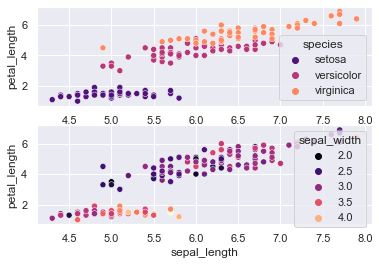

In [44]:
fig, axes = plt.subplots(2, 1)
sns.scatterplot(
    data=iris_df,
    x="sepal_length",
    y="petal_length",
    hue="species",
    palette="magma",
    ax=axes[0]
)
sns.scatterplot(
    data=iris_df,
    x="sepal_length",
    y="petal_length",
    hue="sepal_width",
    palette="magma",
    ax=axes[1]
)


To set the default palette for plots : 

In [40]:
sns.set_palette(
    palette="magma",
    n_colors=3,
    desat=None, 
    color_codes=False
)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

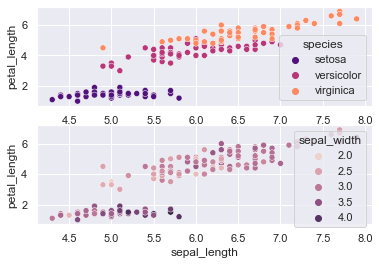

<Figure size 432x288 with 0 Axes>

In [43]:
fig, axes = plt.subplots(2, 1)
sns.scatterplot(
    data=iris_df,
    x="sepal_length",
    y="petal_length",
    hue="species",
    ax=axes[0]
)
sns.scatterplot(
    data=iris_df,
    x="sepal_length",
    y="petal_length",
    hue="sepal_width",
    ax=axes[1]
)


Getting palettes :

In [80]:
display(sns.hls_palette(10))
display(sns.crayon_palette(["Midnight Blue", "Maroon"]))
display(sns.husl_palette(10))
display(sns.mpl_palette("Set2"))
display(sns.xkcd_palette(["acid green", "adobe"]))
display(sns.blend_palette(["acid green", "adobe"], input="xkcd"))

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

[(0.10196078431372549, 0.2823529411764706, 0.4627450980392157),
 (0.7843137254901961, 0.2196078431372549, 0.35294117647058826)]

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775)]

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961)]

[(0.5607843137254902, 0.996078431372549, 0.03529411764705882),
 (0.7411764705882353, 0.4235294117647059, 0.2823529411764706)]

[(0.5607843137254902, 0.996078431372549, 0.03529411764705882),
 (0.5968627450980393, 0.8815686274509804, 0.08470588235294119),
 (0.6329411764705882, 0.7670588235294118, 0.13411764705882354),
 (0.6690196078431373, 0.6525490196078432, 0.18352941176470589),
 (0.7050980392156863, 0.5380392156862746, 0.23294117647058826),
 (0.7411764705882353, 0.4235294117647059, 0.2823529411764706)]

## Creating palette

From list of colors

In [176]:
rgb = [(0.15, 0.25, 0.35), (0.35, 0.55, 0.51)]
color = ((0.15, 0.25, 0.35))

# create a plette from colors
display(sns.blend_palette(["acid green", "adobe"], input="xkcd"))
display(sns.blend_palette(["acid green", "adobe"], n_colors=4, input="xkcd"))
display(sns.blend_palette(rgb))
display(sns.blend_palette(rgb, n_colors=10))
display(sns.color_palette("blend:#123,#987"))


[(0.5607843137254902, 0.996078431372549, 0.03529411764705882),
 (0.5968627450980393, 0.8815686274509804, 0.08470588235294119),
 (0.6329411764705882, 0.7670588235294118, 0.13411764705882354),
 (0.6690196078431373, 0.6525490196078432, 0.18352941176470589),
 (0.7050980392156863, 0.5380392156862746, 0.23294117647058826),
 (0.7411764705882353, 0.4235294117647059, 0.2823529411764706)]

[(0.5607843137254902, 0.996078431372549, 0.03529411764705882),
 (0.6209150326797386, 0.8052287581699347, 0.11764705882352941),
 (0.681045751633987, 0.6143790849673203, 0.2),
 (0.7411764705882353, 0.4235294117647059, 0.2823529411764706)]

[(0.15, 0.25, 0.35),
 (0.19, 0.31, 0.382),
 (0.22999999999999998, 0.37, 0.414),
 (0.26999999999999996, 0.43000000000000005, 0.446),
 (0.31, 0.49000000000000005, 0.478),
 (0.35, 0.55, 0.51)]

[(0.15, 0.25, 0.35),
 (0.17196078431372547, 0.28294117647058825, 0.3675686274509804),
 (0.19392156862745097, 0.3158823529411765, 0.38513725490196077),
 (0.21666666666666665, 0.35, 0.4033333333333333),
 (0.23862745098039212, 0.38294117647058823, 0.42090196078431374),
 (0.2613725490196078, 0.4170588235294118, 0.43909803921568624),
 (0.2833333333333333, 0.45, 0.45666666666666667),
 (0.306078431372549, 0.48411764705882354, 0.4748627450980392),
 (0.3280392156862745, 0.5170588235294118, 0.4924313725490196),
 (0.35, 0.55, 0.51)]

[(0.06666666666666667, 0.13333333333333333, 0.2),
 (0.17333333333333334, 0.21333333333333335, 0.25333333333333335),
 (0.28, 0.29333333333333333, 0.3066666666666667),
 (0.38666666666666666, 0.3733333333333333, 0.36),
 (0.49333333333333335, 0.45333333333333337, 0.41333333333333333),
 (0.6, 0.5333333333333333, 0.4666666666666667)]

In [171]:
# create light and dark palette from a color
display(sns.light_palette(color))
display(sns.color_palette("light:#123"))
display(sns.color_palette("dark:#123"))
display(sns.dark_palette(color))

[(0.9404613181057757, 0.9438264743632852, 0.9489624213005153),
 (0.7823690544846206, 0.8050611794906282, 0.8291699370404122),
 (0.6242767908634654, 0.6662958846179711, 0.7093774527803092),
 (0.4661845272423103, 0.5275305897453141, 0.5895849685202061),
 (0.30809226362115516, 0.388765294872657, 0.469792484260103),
 (0.15, 0.25, 0.35)]

[(0.9403805800549185, 0.9438188590290073, 0.9492721441968625),
 (0.7656377973772681, 0.7817217538898725, 0.79941771535749),
 (0.5908950146996177, 0.6196246487507377, 0.6495632865181176),
 (0.4161522320219674, 0.4575275436116029, 0.499708857678745),
 (0.24140944934431696, 0.2954304384724681, 0.34985442883937257),
 (0.06666666666666667, 0.13333333333333333, 0.2)]

[(0.14063874212347854, 0.1484316481441708, 0.1603933792672441),
 (0.12584432703211618, 0.14541198518200332, 0.16831470341379529),
 (0.1110499119407538, 0.14239232221983583, 0.17623602756034645),
 (0.09625549684939141, 0.1393726592576683, 0.18415735170689765),
 (0.08146108175802905, 0.13635299629550082, 0.19207867585344884),
 (0.06666666666666667, 0.13333333333333333, 0.2)]

[(0.1409884680949199, 0.14843207699238262, 0.15948567225995627),
 (0.14279077447593594, 0.16874566159390608, 0.197588537807965),
 (0.14459308085695194, 0.18905924619542958, 0.23569140335597377),
 (0.14639538723796797, 0.20937283079695304, 0.2737942689039825),
 (0.14819769361898397, 0.22968641539847653, 0.31189713445199124),
 (0.15, 0.25, 0.35)]

In [163]:
display(sns.cubehelix_palette())
display(sns.cubehelix_palette(rot=0.2, hue=0.2))
display(sns.diverging_palette(0, 189))
display(sns.diverging_palette(h_neg=20, h_pos=245))
display(sns.diverging_palette(h_neg=20, h_pos=245, l=75))
display(sns.hls_palette(h=0.01, s=0.1, l=0.45))
display(sns.husl_palette(h=0.01, s=0.1, l=0.45))

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8559578605899612, 0.6418993116910497, 0.6754191211563135],
 [0.739734329496642, 0.4765280683170713, 0.5959617419736206],
 [0.57916573903086, 0.33934576125314425, 0.5219003947563425],
 [0.37894937987025, 0.2224702044652721, 0.41140014301575434],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

[[0.869899300137466, 0.8391184889933615, 0.8630065585731048],
 [0.7364628479297974, 0.691491280597316, 0.7353205120384303],
 [0.5945291952775951, 0.5486415927616355, 0.6051836689912372],
 [0.45081076897313976, 0.4137596290890499, 0.4728289483936711],
 [0.3004328483071575, 0.27791246463269287, 0.32816277210722755],
 [0.15137690704636766, 0.14323792863987792, 0.17360160020830737]]

[(0.8340245009323628, 0.237592525883977, 0.413389203308121),
 (0.8806176189679763, 0.5202959033482922, 0.6259841195095547),
 (0.9276657479219064, 0.8057600559831574, 0.8406551579395181),
 (0.7880812534937227, 0.864829232323563, 0.8621800205546393),
 (0.5124376051624059, 0.685792752516127, 0.680494911529611),
 (0.2394597561379685, 0.5084877667106972, 0.500566911876198)]

[(0.7634747047461135, 0.3348456555528834, 0.225892295531744),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488872),
 (0.9140860646530862, 0.8246826885128927, 0.8028133239419791),
 (0.8089670011714792, 0.8546732498665828, 0.899542373680315),
 (0.5334039304542079, 0.6672628558023607, 0.793815967728721),
 (0.2605058797632158, 0.4816649413712549, 0.6891120608675678)]

[(0.9432425759630878, 0.6512920715114591, 0.6072494052270941),
 (0.9459931469997526, 0.7679455764874202, 0.7411671622566893),
 (0.9487705790816972, 0.8857382758479121, 0.8763927098822766),
 (0.8694468047762741, 0.9039682998264709, 0.946751157344299),
 (0.7209903801777071, 0.8201575300698737, 0.9402392033303693),
 (0.5739697043663602, 0.7371573093438045, 0.9337902275951043)]

[(0.49500000000000005, 0.4104, 0.40499999999999997),
 (0.48960000000000004, 0.49500000000000005, 0.40499999999999997),
 (0.40499999999999997, 0.49500000000000005, 0.4104),
 (0.40499999999999997, 0.48960000000000004, 0.49500000000000005),
 (0.4104, 0.40499999999999997, 0.49500000000000005),
 (0.49500000000000005, 0.40499999999999997, 0.48960000000000004)]

[(0.4769171014804759, 0.39265104750598706, 0.40306972942051095),
 (0.42521928543119214, 0.4116678862467553, 0.39000772421360974),
 (0.39350571340707646, 0.4209458402631629, 0.3895353215697215),
 (0.39331609894420966, 0.41850053915184826, 0.4155792978892076),
 (0.39703504760872643, 0.4149617934890788, 0.43959695489594175),
 (0.44377754599640673, 0.39932203489394064, 0.45007960190458457)]

## named colors

Named colors 

In [120]:
# dict of named colors : sns.xkcd_rgb
# dict of named colors : sns.crayons
#print(sns.crayons)

In [108]:
p = sns.crayon_palette(["Midnight Blue", "Maroon"])
print(p)
display(p)
display(sns.xkcd_palette(["acid green", "adobe"]))

[(0.10196078431372549, 0.2823529411764706, 0.4627450980392157), (0.7843137254901961, 0.2196078431372549, 0.35294117647058826)]


[(0.10196078431372549, 0.2823529411764706, 0.4627450980392157),
 (0.7843137254901961, 0.2196078431372549, 0.35294117647058826)]

[(0.5607843137254902, 0.996078431372549, 0.03529411764705882),
 (0.7411764705882353, 0.4235294117647059, 0.2823529411764706)]

## named palettes

Named palettes

In [89]:
mpl_palette_named_palette = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
display(sns.mpl_palette("Accent"))
display(sns.mpl_palette("Accent_r"))


[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745)]

[(0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (1.0, 1.0, 0.6),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079)]

Seaborn palettes : 

In [95]:
sns_palettes = [
    'deep',
    'muted',
    'bright',
    'pastel',
    'dark',
    'colorblind'
]
for p in sns_palettes:
    display(sns.color_palette(p))

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## plotting a palette

Main interface to plot a palette : 

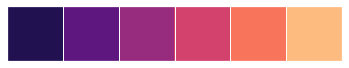

In [52]:
sns.palplot(sns.color_palette("magma"))

Named palettes : 

In [53]:
palette_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
         'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys',
         'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r',
         'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r',
         'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy',
         'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
         'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
         'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
         'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
         'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r',
         'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r',
         'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow',
         'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
         'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire',
         'icefire_r', 'inferno', 'inferno_r', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
         'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism',
         'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring',
         'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r',
         'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r',
         'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter',
         'winter_r']

In [91]:
for p in palette_list:
    print(p)
    display(sns.color_palette(p))

Accent


[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

Accent_r


[(0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (1.0, 1.0, 0.6),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079)]

Blues


[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

Blues_r


[(0.044059976931949255, 0.3338869665513264, 0.6244521337946944),
 (0.16696655132641294, 0.48069204152249134, 0.7291503267973857),
 (0.3262898885044214, 0.6186236063052672, 0.802798923490965),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.8584083044982699, 0.9134486735870818, 0.9645674740484429)]

BrBG


[(0.6313725490196078, 0.3951557093425605, 0.09573241061130335),
 (0.8572856593617839, 0.7257977700884274, 0.4471357170319107),
 (0.9636293733179546, 0.9237985390234525, 0.8185313341022683),
 (0.8299115724721262, 0.9294886582083814, 0.9152633602460593),
 (0.4615916955017304, 0.7748558246828146, 0.7299500192233758),
 (0.0878892733564014, 0.479123414071511, 0.44775086505190315)]

BrBG_r


[(0.08788927335640145, 0.47912341407151104, 0.4477508650519032),
 (0.4615916955017303, 0.7748558246828144, 0.7299500192233757),
 (0.8299115724721262, 0.9294886582083814, 0.9152633602460593),
 (0.9636293733179546, 0.9237985390234525, 0.8185313341022683),
 (0.8572856593617839, 0.7257977700884275, 0.4471357170319108),
 (0.6313725490196078, 0.3951557093425605, 0.09573241061130335)]

BuGn


[(0.8853517877739331, 0.9562168396770473, 0.9668281430219147),
 (0.7419607843137255, 0.9027297193387159, 0.868958093041138),
 (0.516078431372549, 0.8108573625528642, 0.7273510188389081),
 (0.31578623606305267, 0.7152633602460592, 0.5384390618992695),
 (0.17139561707035755, 0.5849288735101883, 0.3263514033064206),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

BuGn_r


[(0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.17139561707035755, 0.5849288735101884, 0.3263514033064206),
 (0.31578623606305267, 0.7152633602460592, 0.5384390618992696),
 (0.516078431372549, 0.8108573625528642, 0.7273510188389081),
 (0.7419607843137255, 0.9027297193387159, 0.868958093041138),
 (0.8853517877739332, 0.9562168396770473, 0.9668281430219147)]

BuPu


[(0.861683967704729, 0.91280276816609, 0.9497577854671281),
 (0.7114648212226067, 0.801276432141484, 0.8883044982698962),
 (0.5899884659746252, 0.6747251057285659, 0.8219915417147251),
 (0.5490196078431373, 0.49036524413687044, 0.7286735870818916),
 (0.5378854286812764, 0.3026989619377163, 0.6384467512495194),
 (0.509434832756632, 0.08419838523644751, 0.5030219146482122)]

BuPu_r


[(0.509434832756632, 0.08419838523644753, 0.5030219146482122),
 (0.5378854286812764, 0.3026989619377163, 0.6384467512495194),
 (0.5490196078431373, 0.49036524413687044, 0.7286735870818916),
 (0.5899884659746252, 0.6747251057285659, 0.8219915417147251),
 (0.7114648212226067, 0.801276432141484, 0.8883044982698962),
 (0.861683967704729, 0.91280276816609, 0.9497577854671281)]

CMRmap


[(0.16941176470588235, 0.15, 0.5323529411764706),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.8805882352941177, 0.44823529411764707)]

CMRmap_r


[(0.9, 0.8805882352941177, 0.44823529411764707),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9419607843137255, 0.39509803921568626, 0.06294117647058824),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.38705882352941173, 0.1645098039215686, 0.6774509803921569),
 (0.16941176470588235, 0.15, 0.5323529411764706)]

Dark2


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

Dark2_r


[(0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196)]

GnBu


[(0.8682814302191465, 0.9488811995386389, 0.8476585928489042),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.37993079584775086, 0.7430988081507113, 0.8027681660899654),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.04913494809688582, 0.4261130334486736, 0.6836447520184545)]

GnBu_r


[(0.04913494809688582, 0.4261130334486736, 0.6836447520184545),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.3799307958477509, 0.7430988081507113, 0.8027681660899654),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.8682814302191465, 0.9488811995386389, 0.8476585928489042)]

Greens


[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

Greens_r


[(0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.8828143021914648, 0.9546943483275664, 0.8621914648212226)]

Greys


[(0.9295040369088812, 0.9295040369088812, 0.9295040369088812),
 (0.819115724721261, 0.819115724721261, 0.819115724721261),
 (0.6770011534025375, 0.6770011534025375, 0.6770011534025375),
 (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
 (0.35912341407151094, 0.35912341407151094, 0.35912341407151094),
 (0.1679354094579008, 0.1679354094579008, 0.1679354094579008)]

Greys_r


[(0.1679354094579008, 0.1679354094579008, 0.1679354094579008),
 (0.359123414071511, 0.359123414071511, 0.359123414071511),
 (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
 (0.6770011534025375, 0.6770011534025375, 0.6770011534025375),
 (0.819115724721261, 0.819115724721261, 0.819115724721261),
 (0.9295040369088812, 0.9295040369088812, 0.9295040369088812)]

OrRd


[(0.9955709342560554, 0.8996539792387543, 0.7629988465974625),
 (0.9921568627450981, 0.8029219530949635, 0.5900192233756247),
 (0.9905113417916186, 0.6576393694732795, 0.4468896578239139),
 (0.9586466743560169, 0.4618992695117263, 0.3103267973856209),
 (0.8704498269896194, 0.2485505574778931, 0.16822760476739718),
 (0.7202306805074971, 0.02435986159169551, 0.015732410611303344)]

OrRd_r


[(0.7202306805074971, 0.024359861591695505, 0.015732410611303347),
 (0.8704498269896194, 0.24855055747789312, 0.16822760476739715),
 (0.9586466743560169, 0.4618992695117263, 0.3103267973856209),
 (0.9905113417916186, 0.6576393694732795, 0.4468896578239139),
 (0.9921568627450981, 0.8029219530949635, 0.5900192233756247),
 (0.9955709342560554, 0.8996539792387543, 0.7629988465974625)]

Oranges


[(0.9955709342560554, 0.8907958477508651, 0.7855132641291811),
 (0.9921568627450981, 0.7769934640522875, 0.5727028066128412),
 (0.9921568627450981, 0.6280507497116494, 0.34226835832372166),
 (0.9648442906574395, 0.47100346020761247, 0.14197616301422528),
 (0.8782929642445213, 0.31990772779700116, 0.024405997693194924),
 (0.6768627450980392, 0.22089965397923875, 0.010749711649365626)]

Oranges_r


[(0.6768627450980392, 0.22089965397923875, 0.010749711649365628),
 (0.8782929642445213, 0.31990772779700116, 0.024405997693194927),
 (0.9648442906574395, 0.47100346020761247, 0.14197616301422528),
 (0.9921568627450981, 0.6280507497116494, 0.34226835832372166),
 (0.9921568627450981, 0.7769934640522875, 0.5727028066128412),
 (0.9955709342560554, 0.8907958477508651, 0.7855132641291811)]

PRGn


[(0.5192618223760093, 0.27773933102652826, 0.578316032295271),
 (0.7387158785082659, 0.6185313341022682, 0.7923875432525951),
 (0.9231064975009612, 0.8690503652441369, 0.9259515570934256),
 (0.8832756632064591, 0.9487120338331411, 0.8662053056516725),
 (0.6100730488273743, 0.8346020761245676, 0.593540945790081),
 (0.20761245674740486, 0.5577854671280277, 0.28350634371395617)]

PRGn_r


[(0.20761245674740494, 0.5577854671280278, 0.2835063437139562),
 (0.6100730488273742, 0.8346020761245676, 0.5935409457900809),
 (0.8832756632064591, 0.9487120338331411, 0.8662053056516725),
 (0.9231064975009612, 0.8690503652441369, 0.9259515570934256),
 (0.738715878508266, 0.6185313341022683, 0.7923875432525952),
 (0.5192618223760093, 0.27773933102652826, 0.578316032295271)]

Paired


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

Paired_r


[(1.0, 1.0, 0.6),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]

Pastel1


[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

Pastel1_r


[(0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (1.0, 1.0, 0.8),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725)]

Pastel2


[(0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.8, 0.8, 0.8)]

Pastel2_r


[(0.9450980392156862, 0.8862745098039215, 0.8),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687)]

PiYG


[(0.8129181084198386, 0.2544405997693195, 0.5693194925028835),
 (0.9348712033833141, 0.6798154555940021, 0.8312187620146096),
 (0.9856978085351787, 0.9031910803537101, 0.9458669742406767),
 (0.9202614379084968, 0.9629373317954633, 0.8576701268742792),
 (0.6908881199538641, 0.8624375240292197, 0.4883506343713959),
 (0.38269896193771624, 0.6403690888119954, 0.18108419838523643)]

PiYG_r


[(0.38269896193771635, 0.6403690888119955, 0.18108419838523648),
 (0.690888119953864, 0.8624375240292196, 0.4883506343713958),
 (0.9202614379084968, 0.9629373317954633, 0.8576701268742792),
 (0.9856978085351789, 0.9031910803537101, 0.9458669742406767),
 (0.9348712033833141, 0.6798154555940024, 0.8312187620146098),
 (0.8129181084198386, 0.2544405997693195, 0.5693194925028835)]

PuBu


[(0.9112802768166091, 0.894717416378316, 0.9429296424452134),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.5687043444828912, 0.7082660515186466, 0.8390772779700115),
 (0.31378700499807766, 0.6058439061899269, 0.7776239907727797),
 (0.07537101114955785, 0.4756324490580546, 0.7084044598231449),
 (0.01619377162629758, 0.3641061130334487, 0.5707035755478662)]

PuBuGn


[(0.9112802768166091, 0.8776470588235293, 0.9361014994232987),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.5473125720876586, 0.7082660515186466, 0.8390772779700115),
 (0.29239523260284506, 0.6058439061899269, 0.7776239907727797),
 (0.06702037677816225, 0.522952710495963, 0.6026297577854671),
 (0.004429065743944636, 0.43418685121107264, 0.37388696655132636)]

PuBuGn_r


[(0.004429065743944636, 0.43418685121107264, 0.3738869665513264),
 (0.06702037677816225, 0.522952710495963, 0.6026297577854671),
 (0.29239523260284506, 0.6058439061899269, 0.7776239907727797),
 (0.5473125720876586, 0.7082660515186467, 0.8390772779700115),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.9112802768166091, 0.8776470588235293, 0.9361014994232987)]

PuBu_r


[(0.01619377162629758, 0.3641061130334487, 0.5707035755478662),
 (0.07537101114955785, 0.4756324490580546, 0.7084044598231449),
 (0.31378700499807766, 0.6058439061899269, 0.7776239907727797),
 (0.5687043444828912, 0.7082660515186467, 0.8390772779700115),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.9112802768166091, 0.894717416378316, 0.9429296424452134)]

PuOr


[(0.7746251441753171, 0.4129181084198385, 0.04613610149942329),
 (0.9765474817377932, 0.6925028835063436, 0.34571318723567845),
 (0.9885428681276432, 0.9031910803537101, 0.7836985774702038),
 (0.8804306036139947, 0.8861207227989235, 0.9344867358708189),
 (0.671126489811611, 0.6404459823144946, 0.8030757400999616),
 (0.40046136101499424, 0.2756632064590542, 0.5914648212226067)]

PuOr_r


[(0.4004613610149943, 0.27566320645905434, 0.5914648212226068),
 (0.6711264898116109, 0.6404459823144946, 0.8030757400999616),
 (0.8804306036139947, 0.8861207227989235, 0.9344867358708189),
 (0.9885428681276432, 0.9031910803537101, 0.7836985774702038),
 (0.9765474817377932, 0.6925028835063437, 0.34571318723567857),
 (0.7746251441753171, 0.4129181084198385, 0.0461361014994233)]

PuRd


[(0.896239907727797, 0.8620530565167243, 0.9265974625144175),
 (0.8188542868127644, 0.6833833141099577, 0.833279507881584),
 (0.8244367550941946, 0.5030526720492119, 0.7425451749327182),
 (0.892718185313341, 0.25951557093425603, 0.6037062668204536),
 (0.8362937331795464, 0.09676278354479047, 0.3964321414840446),
 (0.6234832756632065, 0.009134948096885809, 0.2723875432525952)]

PuRd_r


[(0.6234832756632065, 0.009134948096885814, 0.2723875432525952),
 (0.8362937331795464, 0.09676278354479047, 0.3964321414840446),
 (0.892718185313341, 0.25951557093425603, 0.6037062668204537),
 (0.8244367550941946, 0.5030526720492119, 0.7425451749327182),
 (0.8188542868127644, 0.6833833141099577, 0.833279507881584),
 (0.896239907727797, 0.8620530565167244, 0.9265974625144175)]

Purples


[(0.9265974625144175, 0.919769319492503, 0.9557093425605536),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938),
 (0.6878892733564014, 0.6835832372164552, 0.829834678969627),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.3405767012687428, 0.1742560553633218, 0.5709342560553633)]

Purples_r


[(0.3405767012687428, 0.1742560553633218, 0.5709342560553633),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.6878892733564014, 0.6835832372164552, 0.8298346789696271),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938),
 (0.9265974625144175, 0.919769319492503, 0.9557093425605536)]

RdBu


[(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]

RdBu_r


[(0.18431372549019615, 0.4726643598615917, 0.7116493656286045),
 (0.5300269127258748, 0.7456362937331797, 0.8560553633217993),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.9856978085351789, 0.8889657823913879, 0.8320645905420991),
 (0.9407151095732411, 0.609919261822376, 0.481276432141484),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587)]

RdGy


[(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9943098808150711, 0.8975778546712803, 0.8406766628219915),
 (0.9118031526336026, 0.9118031526336026, 0.9118031526336026),
 (0.7019607843137257, 0.7019607843137257, 0.7019607843137257),
 (0.3956170703575548, 0.3956170703575548, 0.3956170703575548)]

RdGy_r


[(0.3956170703575549, 0.3956170703575549, 0.3956170703575549),
 (0.7019607843137255, 0.7019607843137255, 0.7019607843137255),
 (0.9118031526336026, 0.9118031526336026, 0.9118031526336026),
 (0.9943098808150711, 0.8975778546712803, 0.8406766628219915),
 (0.9407151095732411, 0.609919261822376, 0.481276432141484),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587)]

RdPu


[(0.9916493656286044, 0.8647289504036909, 0.8519492502883507),
 (0.9859592464436755, 0.7293041138023837, 0.7404229142637447),
 (0.9754555940023067, 0.5330257593233372, 0.6768935024990388),
 (0.9094502114571319, 0.2894886582083814, 0.6086120722798923),
 (0.735840061514802, 0.06196078431372548, 0.5225682429834679),
 (0.5048212226066897, 0.00392156862745098, 0.47021914648212226)]

RdPu_r


[(0.5048212226066897, 0.00392156862745098, 0.47021914648212226),
 (0.735840061514802, 0.061960784313725495, 0.5225682429834679),
 (0.9094502114571319, 0.2894886582083814, 0.6086120722798923),
 (0.9754555940023067, 0.5330257593233372, 0.6768935024990388),
 (0.9859592464436755, 0.7293041138023837, 0.7404229142637447),
 (0.9916493656286044, 0.8647289504036909, 0.8519492502883507)]

RdYlBu


[(0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6153018069973087),
 (0.9118031526336026, 0.9658592848904267, 0.9111880046136099),
 (0.6409842368319879, 0.8272971933871589, 0.90080738177624),
 (0.346482122260669, 0.5492502883506344, 0.7527104959630911)]

RdYlBu_r


[(0.34648212226066905, 0.5492502883506345, 0.7527104959630911),
 (0.6409842368319878, 0.8272971933871589, 0.90080738177624),
 (0.9118031526336026, 0.9658592848904267, 0.9111880046136099),
 (0.9971549404075356, 0.9118031526336025, 0.6153018069973087),
 (0.9873125720876587, 0.647366397539408, 0.36424452133794694),
 (0.8899653979238754, 0.28673587081891583, 0.19815455594002307)]

RdYlGn


[(0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.8918877354863515, 0.954479046520569, 0.6010765090349867),
 (0.6165321030372937, 0.8359092656670513, 0.41191849288735105),
 (0.22468281430219145, 0.6558246828143022, 0.3444059976931949)]

RdYlGn_r


[(0.2246828143021916, 0.6558246828143023, 0.34440599769319497),
 (0.6165321030372936, 0.8359092656670511, 0.41191849288735105),
 (0.8918877354863515, 0.954479046520569, 0.6010765090349867),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9873125720876587, 0.647366397539408, 0.36424452133794694),
 (0.8899653979238754, 0.28673587081891583, 0.19815455594002307)]

Reds


[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

Reds_r


[(0.6663437139561708, 0.06339100346020761, 0.08641291810841982),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9950634371395617, 0.8596539792387543, 0.7986620530565167)]

Set1


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

Set1_r


[(0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (1.0, 1.0, 0.2),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

Set2


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

Set2_r


[(0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

Set3


[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

Set3_r


[(0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (1.0, 1.0, 0.7019607843137254)]

Spectral


[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

Spectral_r


[(0.28004613610149953, 0.6269896193771627, 0.7024221453287197),
 (0.633448673587082, 0.8521337946943484, 0.6436755094194541),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9873125720876587, 0.647366397539408, 0.36424452133794694),
 (0.8853517877739332, 0.3190311418685121, 0.29042675893886966)]

Wistia


[(0.9539100346020761, 0.9490657439446367, 0.26583621683967706),
 (1.0, 0.8853364090734333, 0.08716647443291042),
 (1.0, 0.7901114955786236, 0.029588619761630144),
 (1.0, 0.7081737793156478, 0.0),
 (1.0, 0.6439523260284505, 0.0),
 (0.994878892733564, 0.571118800461361, 0.0)]

Wistia_r


[(0.994878892733564, 0.571118800461361, 0.0),
 (1.0, 0.6439523260284505, 0.0),
 (1.0, 0.7081737793156478, 0.0),
 (1.0, 0.7901114955786236, 0.029588619761630144),
 (1.0, 0.8853364090734333, 0.08716647443291041),
 (0.9539100346020761, 0.9490657439446367, 0.26583621683967706)]

YlGn


[(0.9534025374855825, 0.9821453287197233, 0.7143252595155709),
 (0.8009073433294887, 0.9195540176855056, 0.6153171856978085),
 (0.5912187620146098, 0.8288196847366398, 0.5223068050749712),
 (0.3454056132256824, 0.7150173010380623, 0.41078046905036525),
 (0.17139561707035755, 0.5620299884659746, 0.2923337178008458),
 (0.017762399077277974, 0.4220530565167243, 0.22177623990772782)]

YlGnBu


[(0.9101268742791234, 0.9649365628604383, 0.6956401384083045),
 (0.6984544405997694, 0.8818608227604767, 0.7138485198000769),
 (0.39601691657054977, 0.7660745866974241, 0.7481430219146482),
 (0.1729642445213379, 0.6295117262591311, 0.759523260284506),
 (0.12764321414840446, 0.42666666666666664, 0.6861361014994233),
 (0.14357554786620533, 0.22523644752018454, 0.5905420991926182)]

YlGnBu_r


[(0.14357554786620533, 0.22523644752018454, 0.5905420991926182),
 (0.12764321414840446, 0.4266666666666667, 0.6861361014994233),
 (0.17296424452133796, 0.6295117262591311, 0.759523260284506),
 (0.3960169165705498, 0.7660745866974241, 0.7481430219146482),
 (0.6984544405997694, 0.8818608227604767, 0.7138485198000769),
 (0.9101268742791234, 0.9649365628604383, 0.6956401384083045)]

YlGn_r


[(0.017762399077277974, 0.4220530565167243, 0.2217762399077278),
 (0.17139561707035755, 0.5620299884659746, 0.2923337178008458),
 (0.3454056132256824, 0.7150173010380623, 0.41078046905036525),
 (0.5912187620146098, 0.8288196847366398, 0.5223068050749712),
 (0.8009073433294887, 0.9195540176855056, 0.6153171856978085),
 (0.9534025374855825, 0.9821453287197233, 0.7143252595155709)]

YlOrBr


[(0.9994925028835063, 0.9584775086505191, 0.7154325259515572),
 (0.996078431372549, 0.8549173394848135, 0.493517877739331),
 (0.996078431372549, 0.6978700499807766, 0.24727412533640908),
 (0.9551095732410612, 0.5066820453671664, 0.11298731257208766),
 (0.8364167627835448, 0.3390080738177624, 0.028327566320645904),
 (0.6258823529411764, 0.21610149942329873, 0.01467128027681661)]

YlOrBr_r


[(0.6258823529411764, 0.21610149942329873, 0.01467128027681661),
 (0.8364167627835448, 0.3390080738177624, 0.028327566320645908),
 (0.9551095732410612, 0.5066820453671664, 0.11298731257208766),
 (0.996078431372549, 0.6978700499807766, 0.24727412533640908),
 (0.996078431372549, 0.8549173394848135, 0.49351787773933103),
 (0.9994925028835063, 0.9584775086505191, 0.7154325259515572)]

YlOrRd


[(0.9994925028835063, 0.9192618223760093, 0.6061361014994233),
 (0.996078431372549, 0.8065974625144174, 0.41494809688581313),
 (0.9944329104190696, 0.6371549404075355, 0.2717108804306036),
 (0.9898808150711266, 0.40955017301038066, 0.19432525951557092),
 (0.9186466743560169, 0.16113802383698578, 0.1257362552864283),
 (0.7604613610149943, 0.013194925028835056, 0.14394463667820068)]

YlOrRd_r


[(0.7604613610149943, 0.013194925028835064, 0.14394463667820068),
 (0.9186466743560169, 0.16113802383698578, 0.1257362552864283),
 (0.9898808150711266, 0.40955017301038066, 0.19432525951557095),
 (0.9944329104190696, 0.6371549404075356, 0.2717108804306036),
 (0.996078431372549, 0.8065974625144176, 0.41494809688581313),
 (0.9994925028835063, 0.9192618223760093, 0.6061361014994233)]

afmhot


[(0.2823529411764706, 0.0, 0.0),
 (0.5725490196078431, 0.0725490196078431, 0.0),
 (0.8549019607843137, 0.3549019607843137, 0.0),
 (1.0, 0.6450980392156862, 0.1450980392156862),
 (1.0, 0.9274509803921569, 0.4274509803921569),
 (1.0, 1.0, 0.7176470588235293)]

afmhot_r


[(1.0, 1.0, 0.7176470588235295),
 (1.0, 0.9274509803921569, 0.4274509803921569),
 (1.0, 0.6450980392156862, 0.1450980392156862),
 (0.8549019607843138, 0.3549019607843138, 0.0),
 (0.5725490196078431, 0.0725490196078431, 0.0),
 (0.2823529411764707, 0.0, 0.0)]

autumn


[(1.0, 0.1411764705882353, 0.0),
 (1.0, 0.28627450980392155, 0.0),
 (1.0, 0.42745098039215684, 0.0),
 (1.0, 0.5725490196078431, 0.0),
 (1.0, 0.7137254901960784, 0.0),
 (1.0, 0.8588235294117647, 0.0)]

autumn_r


[(1.0, 0.8588235294117648, 0.0),
 (1.0, 0.7137254901960784, 0.0),
 (1.0, 0.5725490196078431, 0.0),
 (1.0, 0.4274509803921569, 0.0),
 (1.0, 0.28627450980392155, 0.0),
 (1.0, 0.14117647058823535, 0.0)]

binary


[(0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535)]

binary_r


[(0.1411764705882353, 0.1411764705882353, 0.1411764705882353),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.42745098039215684, 0.42745098039215684, 0.42745098039215684),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.8588235294117647, 0.8588235294117647, 0.8588235294117647)]

bone


[(0.12352941176470589, 0.12352936342706163, 0.17186700767263427),
 (0.25049019607843137, 0.25049009806043054, 0.3485080988917306),
 (0.3740196078431372, 0.3944852761182057, 0.49901949512261384),
 (0.5009803921568627, 0.5690563247931928, 0.6259803080024994),
 (0.6245098039215686, 0.7389092370175045, 0.7495097475613068),
 (0.8069852246322835, 0.8764705882352941, 0.8764705604411924)]

bone_r


[(0.8069852246322834, 0.8764705882352941, 0.8764705604411924),
 (0.6245098039215685, 0.7389092370175045, 0.7495097475613071),
 (0.5009803921568627, 0.5690563247931928, 0.6259803080024995),
 (0.3740196078431372, 0.39448527611820583, 0.499019495122614),
 (0.2504901960784313, 0.2504900980604306, 0.34850809889173073),
 (0.12352941176470589, 0.12352936342706167, 0.1718670076726343)]

brg


[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

brg_r


[(0.2823529411764706, 0.7176470588235294, 0.0),
 (0.5725490196078431, 0.4274509803921569, 0.0),
 (0.8549019607843137, 0.14509803921568631, 0.0),
 (0.8549019607843137, 0.0, 0.1450980392156863),
 (0.5725490196078431, 0.0, 0.42745098039215684),
 (0.2823529411764706, 0.0, 0.7176470588235294)]

bwr


[(0.2823529411764706, 0.2823529411764706, 1.0),
 (0.5725490196078431, 0.5725490196078431, 1.0),
 (0.8549019607843137, 0.8549019607843137, 1.0),
 (1.0, 0.8549019607843137, 0.8549019607843137),
 (1.0, 0.5725490196078431, 0.5725490196078431),
 (1.0, 0.2823529411764706, 0.2823529411764706)]

bwr_r


[(1.0, 0.2823529411764706, 0.2823529411764706),
 (1.0, 0.5725490196078431, 0.5725490196078431),
 (1.0, 0.8549019607843137, 0.8549019607843137),
 (0.8549019607843137, 0.8549019607843137, 1.0),
 (0.5725490196078431, 0.5725490196078431, 1.0),
 (0.2823529411764706, 0.2823529411764706, 1.0)]

cividis


[(0.130669, 0.231458, 0.43284),
 (0.298421, 0.332247, 0.423973),
 (0.42512, 0.431334, 0.447692),
 (0.555393, 0.537807, 0.471147),
 (0.695985, 0.648334, 0.440072),
 (0.849223, 0.771947, 0.359729)]

cividis_r


[(0.849223, 0.771947, 0.359729),
 (0.695985, 0.648334, 0.440072),
 (0.555393, 0.537807, 0.471147),
 (0.42512, 0.431334, 0.447692),
 (0.298421, 0.332247, 0.423973),
 (0.130669, 0.231458, 0.43284)]

cool


[(0.1411764705882353, 0.8588235294117648, 1.0),
 (0.28627450980392155, 0.7137254901960784, 1.0),
 (0.42745098039215684, 0.5725490196078431, 1.0),
 (0.5725490196078431, 0.4274509803921569, 1.0),
 (0.7137254901960784, 0.28627450980392155, 1.0),
 (0.8588235294117647, 0.14117647058823535, 1.0)]

cool_r


[(0.8588235294117648, 0.1411764705882353, 1.0),
 (0.7137254901960784, 0.28627450980392155, 1.0),
 (0.5725490196078431, 0.42745098039215684, 1.0),
 (0.4274509803921569, 0.5725490196078431, 1.0),
 (0.28627450980392155, 0.7137254901960784, 1.0),
 (0.14117647058823535, 0.8588235294117647, 1.0)]

coolwarm


[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

coolwarm_r


[(0.8846434386941177, 0.41001709788235297, 0.32250654924705885),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.4044212904941176, 0.5346434904470588, 0.9320019126352941)]

copper


[(0.17439442263383828, 0.1102870588235294, 0.07023529411764706),
 (0.3536331347852832, 0.22363764705882352, 0.14242156862745098),
 (0.5280275574191214, 0.3339247058823529, 0.21265686274509804),
 (0.7072662695705664, 0.44727529411764705, 0.28484313725490196),
 (0.8816606922044046, 0.5575623529411765, 0.355078431372549),
 (1.0, 0.6709129411764706, 0.42726470588235294)]

copper_r


[(1.0, 0.6709129411764706, 0.42726470588235294),
 (0.8816606922044046, 0.5575623529411765, 0.355078431372549),
 (0.7072662695705663, 0.4472752941176471, 0.28484313725490196),
 (0.5280275574191214, 0.33392470588235296, 0.21265686274509804),
 (0.35363313478528313, 0.2236376470588235, 0.14242156862745098),
 (0.1743944226338383, 0.1102870588235294, 0.07023529411764706)]

cubehelix


[(0.10231025194333628, 0.13952898866828906, 0.2560120319409181),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.4106130272672762, 0.48044780541672255, 0.1891154277778484),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.7775608374378459, 0.8840392521212448, 0.9452007992345052)]

cubehelix_r


[(0.7775608374378459, 0.884039252121245, 0.9452007992345051),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.4106130272672764, 0.4804478054167226, 0.1891154277778484),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.10231025194333626, 0.13952898866828914, 0.25601203194091815)]

flag


[(1.0, 0.9862007473534027, 0.9352137256724868),
 (0.0, 0.0, 1.0),
 (0.0, 0.0, 0.03160904485932692),
 (1.0, 0.11065268189150011, 0.031609044859322644),
 (1.0, 0.9984636039674343, 1.0),
 (0.0, 0.0, 0.9352137256724924)]

flag_r


[(0.0, 0.0, 0.9352137256724836),
 (1.0, 0.9984636039674343, 1.0),
 (1.0, 0.11065268189150011, 0.031609044859322644),
 (0.0, 0.0, 0.0316090448593227),
 (0.0, 0.0, 1.0),
 (1.0, 0.9862007473534036, 0.9352137256724901)]

gist_earth


[(0.09408431928011998, 0.25456763098682095, 0.4747997187719709),
 (0.19002743319550042, 0.5042304347826086, 0.49565724681625223),
 (0.25661406784936197, 0.5855013377926422, 0.32284437777281283),
 (0.5107321752862218, 0.6620551820728292, 0.32917535903993705),
 (0.724172627277075, 0.7035188948306594, 0.37379467833956326),
 (0.8342929845025828, 0.6922737254901962, 0.5786758598521377)]

gist_earth_r


[(0.8342929845025828, 0.6922737254901962, 0.5786758598521375),
 (0.7241726272770749, 0.7035188948306594, 0.37379467833956326),
 (0.5107321752862218, 0.6620551820728292, 0.32917535903993705),
 (0.25661406784936197, 0.5855013377926422, 0.32284437777281283),
 (0.19002743319550042, 0.5042304347826088, 0.49565724681625223),
 (0.09408431928011998, 0.25456763098682095, 0.4747997187719709)]

gist_gray


[(0.1411764705882353, 0.1411764705882353, 0.1411764705882353),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.42745098039215684, 0.42745098039215684, 0.42745098039215684),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.8588235294117647, 0.8588235294117647, 0.8588235294117647)]

gist_gray_r


[(0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535)]

gist_heat


[(0.21176470588235294, 0.0, 0.0),
 (0.4294117647058823, 0.0, 0.0),
 (0.6411764705882352, 0.0, 0.0),
 (0.8588235294117647, 0.1450980392156862, 0.0),
 (1.0, 0.4274509803921569, 0.0),
 (1.0, 0.7176470588235293, 0.4352941176470586)]

gist_heat_r


[(1.0, 0.7176470588235295, 0.43529411764705905),
 (1.0, 0.4274509803921569, 0.0),
 (0.8588235294117647, 0.1450980392156862, 0.0),
 (0.6411764705882353, 0.0, 0.0),
 (0.4294117647058823, 0.0, 0.0),
 (0.21176470588235302, 0.0, 0.0)]

gist_ncar


[(0.0, 0.4981591003460206, 1.0),
 (0.0, 0.986936604088444, 0.368548620127168),
 (0.5182809189613916, 0.9998402909550916, 0.04680407496331866),
 (1.0, 0.8743443122968675, 0.0),
 (1.0, 0.14918899559823937, 0.0),
 (0.6912889749219927, 0.2682950819672131, 0.9811260366441659)]

gist_ncar_r


[(0.6912889749219925, 0.26829508196721324, 0.9811260366441659),
 (1.0, 0.14918899559823937, 0.0),
 (1.0, 0.8743443122968676, 0.0),
 (0.5182809189613913, 0.9998402909550919, 0.046804074963318704),
 (0.0, 0.986936604088444, 0.3685486201271679),
 (0.0, 0.4981591003460205, 1.0)]

gist_rainbow


[(1.0, 0.6009538950715422, 0.0),
 (0.6147323794382618, 1.0, 0.0),
 (0.0, 1.0, 0.14758591608686492),
 (0.0, 1.0, 0.9276829011174367),
 (0.0, 0.3058397271952257, 1.0),
 (0.4827365728900258, 0.0, 1.0)]

gist_rainbow_r


[(0.4827365728900257, 0.0, 1.0),
 (0.0, 0.3058397271952259, 1.0),
 (0.0, 1.0, 0.9276829011174363),
 (0.0, 1.0, 0.1475859160868649),
 (0.6147323794382616, 1.0, 0.0),
 (1.0, 0.6009538950715423, 0.0)]

gist_stern


[(0.5691674045962472, 0.1411764705882353, 0.2823529411764706),
 (0.28627450980392155, 0.28627450980392155, 0.5725490196078431),
 (0.42745098039215684, 0.42745098039215684, 0.8549019607843137),
 (0.5725490196078431, 0.5725490196078431, 0.6912807676261994),
 (0.7137254901960784, 0.7137254901960784, 0.09052982895285744),
 (0.8588235294117648, 0.8588235294117647, 0.4672586015538292)]

gist_stern_r


[(0.8588235294117648, 0.8588235294117648, 0.46725860155382914),
 (0.7137254901960784, 0.7137254901960784, 0.0905298289528577),
 (0.5725490196078431, 0.5725490196078431, 0.6912807676261994),
 (0.4274509803921569, 0.4274509803921569, 0.8549019607843137),
 (0.28627450980392166, 0.28627450980392155, 0.5725490196078431),
 (0.569167404596247, 0.14117647058823535, 0.2823529411764706)]

gist_yarg


[(0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535)]

gist_yarg_r


[(0.14117647058823524, 0.14117647058823524, 0.14117647058823524),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.8588235294117647, 0.8588235294117647, 0.8588235294117647)]

gnuplot


[(0.37573457465108967, 0.002813759413800122, 0.7752039761111297),
 (0.5350462688440333, 0.023461082087583202, 0.9741386021045102),
 (0.6537973542254181, 0.07810142403751195, 0.44021574083098747),
 (0.7566696898963531, 0.18768865670066562, 0.0),
 (0.8448227566750782, 0.36357467339107885, 0.0),
 (0.9267273220380225, 0.6334492163647465, 0.0)]

gnuplot2


[(0.0, 0.0, 0.5647058823529412),
 (0.11335784313725483, 0.0, 1.0),
 (0.5545343137254901, 0.014901960784313717, 0.9850980392156864),
 (1.0, 0.30509803921568623, 0.6949019607843139),
 (1.0, 0.5874509803921569, 0.4125490196078432),
 (1.0, 0.8776470588235293, 0.12235294117647078)]

gnuplot2_r


[(1.0, 0.8776470588235296, 0.12235294117647055),
 (1.0, 0.5874509803921569, 0.4125490196078432),
 (1.0, 0.30509803921568623, 0.6949019607843139),
 (0.5545343137254903, 0.014901960784313828, 0.9850980392156863),
 (0.11335784313725483, 0.0, 1.0),
 (0.0, 0.0, 0.5647058823529414)]

gnuplot_r


[(0.9267273220380225, 0.6334492163647467, 0.0),
 (0.8448227566750782, 0.36357467339107885, 0.0),
 (0.7566696898963531, 0.18768865670066562, 0.0),
 (0.6537973542254182, 0.07810142403751198, 0.4402157408309871),
 (0.5350462688440333, 0.023461082087583202, 0.9741386021045102),
 (0.3757345746510898, 0.002813759413800125, 0.77520397611113)]

gray


[(0.1411764705882353, 0.1411764705882353, 0.1411764705882353),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.42745098039215684, 0.42745098039215684, 0.42745098039215684),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.8588235294117647, 0.8588235294117647, 0.8588235294117647)]

gray_r


[(0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535)]

hot


[(0.41221438595965454, 0.0, 0.0),
 (0.7931236159737438, 0.0, 0.0),
 (1.0, 0.16372618247436524, 0.0),
 (1.0, 0.544607916482724, 0.0),
 (1.0, 0.9151955495719379, 0.0),
 (1.0, 1.0, 0.44411709117591475)]

hot_r


[(1.0, 1.0, 0.4441170911759147),
 (1.0, 0.9151955495719377, 0.0),
 (1.0, 0.544607916482724, 0.0),
 (1.0, 0.16372618247436543, 0.0),
 (0.793123615973744, 0.0, 0.0),
 (0.41221438595965454, 0.0, 0.0)]

hsv


[(1.0, 0.8338243632361279, 0.0),
 (0.309189485660074, 1.0, 0.0),
 (0.0, 1.0, 0.5246319661417559),
 (0.0, 0.6183848775760541, 1.0),
 (0.2154394856600736, 0.0, 1.0),
 (1.0, 0.0, 0.9275743632361277)]

hsv_r


[(1.0, 0.0, 0.9275743632361279),
 (0.21543948566007387, 0.0, 1.0),
 (0.0, 0.618384877576054, 1.0),
 (0.0, 1.0, 0.524631966141756),
 (0.30918948566007387, 1.0, 0.0),
 (1.0, 0.8338243632361275, 0.0)]

icefire


[(0.33355526, 0.64107876, 0.80445484),
 (0.28708711, 0.32912157, 0.69034504),
 (0.15652427, 0.15348248, 0.22238175),
 (0.22994394, 0.13076731, 0.15146314),
 (0.61319563, 0.1824336, 0.2687872),
 (0.91463791, 0.43668557, 0.21367954)]

icefire_r


[(0.91463791, 0.43668557, 0.21367954),
 (0.61319563, 0.1824336, 0.2687872),
 (0.22994394, 0.13076731, 0.15146314),
 (0.15652427, 0.15348248, 0.22238175),
 (0.28708711, 0.32912157, 0.69034504),
 (0.33355526, 0.64107876, 0.80445484)]

inferno


[(0.15585, 0.044559, 0.325338),
 (0.397674, 0.083257, 0.433183),
 (0.621685, 0.164184, 0.388781),
 (0.832299, 0.283913, 0.257383),
 (0.961293, 0.488716, 0.084289),
 (0.981173, 0.759135, 0.156863)]

inferno_r


[(0.981173, 0.759135, 0.156863),
 (0.961293, 0.488716, 0.084289),
 (0.832299, 0.283913, 0.257383),
 (0.621685, 0.164184, 0.388781),
 (0.397674, 0.083257, 0.433183),
 (0.15585, 0.044559, 0.325338)]

jet_r


[(1.0, 0.18954248366013082, 0.0),
 (1.0, 0.7269426289034133, 0.0),
 (0.7179000632511068, 1.0, 0.24984187223276413),
 (0.249841872232764, 1.0, 0.717900063251107),
 (0.0, 0.6450980392156862, 1.0),
 (0.0, 0.06470588235294117, 1.0)]

magma


[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

magma_r


[(0.997341, 0.733545, 0.505167),
 (0.973381, 0.46152, 0.361965),
 (0.828886, 0.262229, 0.430644),
 (0.594508, 0.175701, 0.501241),
 (0.372116, 0.092816, 0.499053),
 (0.135053, 0.068391, 0.315)]

mako


[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

mako_r


[(0.54578602, 0.8544913, 0.69848331),
 (0.25187832, 0.71827158, 0.67872193),
 (0.20344718, 0.56074869, 0.65649508),
 (0.21607792, 0.39736958, 0.61948028),
 (0.25307401, 0.23772973, 0.48316271),
 (0.18195582, 0.11955283, 0.23136943)]

nipy_spectral


[(0.0941117647058824, 0.0, 0.6549294117647059),
 (0.0, 0.5634078431372549, 0.8667),
 (0.0, 0.6300803921568627, 0.24050784313725487),
 (0.0, 0.9268156862745098, 0.0),
 (0.9516098039215687, 0.8967078431372549, 0.0),
 (0.9764764705882353, 0.0, 0.0)]

nipy_spectral_r


[(0.9764764705882353, 0.0, 0.0),
 (0.9516098039215687, 0.8967078431372548, 0.0),
 (0.0, 0.9268156862745097, 0.0),
 (0.0, 0.6300803921568627, 0.2405078431372549),
 (0.0, 0.5634078431372549, 0.8667),
 (0.09411176470588235, 0.0, 0.6549294117647059)]

ocean


[(0.0, 0.28823529411764703, 0.1411764705882353),
 (0.0, 0.07058823529411767, 0.28627450980392155),
 (0.0, 0.14117647058823524, 0.42745098039215684),
 (0.0, 0.35882352941176465, 0.5725490196078431),
 (0.14117647058823524, 0.5705882352941176, 0.7137254901960784),
 (0.5764705882352938, 0.7882352941176469, 0.8588235294117647)]

ocean_r


[(0.5764705882352943, 0.7882352941176471, 0.8588235294117648),
 (0.14117647058823524, 0.5705882352941176, 0.7137254901960784),
 (0.0, 0.35882352941176465, 0.5725490196078431),
 (0.0, 0.14117647058823535, 0.4274509803921569),
 (0.0, 0.07058823529411767, 0.28627450980392155),
 (0.0, 0.288235294117647, 0.14117647058823535)]

pink


[(0.4811158781727017, 0.3067383334519217, 0.3067383334519217),
 (0.6746985819081114, 0.4368582980372392, 0.4368582980372392),
 (0.7863194289402525, 0.5826776451008805, 0.5338170219931986),
 (0.8455941614259261, 0.7504779178960943, 0.6178137589580531),
 (0.8995266582975406, 0.8836714660905248, 0.6897937079885315),
 (0.951777174202586, 0.951777174202586, 0.8488555662223309)]

pink_r


[(0.951777174202586, 0.951777174202586, 0.8488555662223309),
 (0.8995266582975406, 0.8836714660905249, 0.6897937079885315),
 (0.8455941614259261, 0.7504779178960943, 0.6178137589580531),
 (0.7863194289402525, 0.5826776451008804, 0.5338170219931985),
 (0.6746985819081114, 0.43685829803723925, 0.43685829803723925),
 (0.4811158781727016, 0.30673833345192164, 0.30673833345192164)]

plasma


[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

plasma_r


[(0.994495, 0.74088, 0.166335),
 (0.95547, 0.533093, 0.28549),
 (0.85975, 0.360588, 0.406917),
 (0.723444, 0.196158, 0.538981),
 (0.546157, 0.038954, 0.64701),
 (0.32515, 0.006915, 0.639512)]

prism


[(0.2280405192384154, 0.9359470417164775, 0.0),
 (1.0, 0.0, 0.0582462106923429),
 (0.2607461041404445, 0.9584992034392541, 0.0),
 (1.0, 0.0, 0.11632899491412466),
 (0.29459996837203795, 0.9792879301617472, 0.0),
 (1.0, 0.0, 0.1740853847346898)]

prism_r


[(1.0, 0.0, 0.17408538473467433),
 (0.29459996837203795, 0.9792879301617472, 0.0),
 (1.0, 0.0, 0.11632899491412466),
 (0.26074610414044, 0.9584992034392512, 0.0),
 (1.0, 0.0, 0.0582462106923429),
 (0.22804051923841318, 0.9359470417164759, 0.0)]

rainbow


[(0.21764705882352942, 0.42912060877260894, 0.9755119679804366),
 (0.0725490196078431, 0.7829276104921027, 0.9005867023006374),
 (0.3549019607843137, 0.9741386021045101, 0.7829276104921028),
 (0.6450980392156862, 0.9741386021045102, 0.622112816721474),
 (0.9274509803921569, 0.782927610492103, 0.43467642176596505),
 (1.0, 0.4291206087726091, 0.2199463578396687)]

rainbow_r


[(1.0, 0.4291206087726087, 0.21994635783966848),
 (0.9274509803921569, 0.782927610492103, 0.43467642176596505),
 (0.6450980392156862, 0.9741386021045102, 0.622112816721474),
 (0.3549019607843138, 0.9741386021045101, 0.7829276104921028),
 (0.0725490196078431, 0.7829276104921027, 0.9005867023006374),
 (0.2176470588235293, 0.4291206087726091, 0.9755119679804366)]

rocket


[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

rocket_r


[(0.96516917, 0.70776351, 0.5606593),
 (0.95381595, 0.46373781, 0.31769923),
 (0.8833417, 0.19830556, 0.26014181),
 (0.67824099, 0.09192342, 0.3504148),
 (0.43860848, 0.12177004, 0.34119475),
 (0.20973515, 0.09747934, 0.24238489)]

seismic


[(0.0, 0.0, 0.6952941176470588),
 (0.1450980392156863, 0.1450980392156863, 1.0),
 (0.7098039215686275, 0.7098039215686275, 1.0),
 (1.0, 0.7098039215686274, 0.7098039215686274),
 (1.0, 0.14509803921568631, 0.14509803921568631),
 (0.7823529411764706, 0.0, 0.0)]

seismic_r


[(0.7823529411764706, 0.0, 0.0),
 (1.0, 0.1450980392156863, 0.1450980392156863),
 (1.0, 0.7098039215686275, 0.7098039215686275),
 (0.7098039215686274, 0.7098039215686274, 1.0),
 (0.14509803921568631, 0.14509803921568631, 1.0),
 (0.0, 0.0, 0.6952941176470588)]

spring


[(1.0, 0.1411764705882353, 0.8588235294117648),
 (1.0, 0.28627450980392155, 0.7137254901960784),
 (1.0, 0.42745098039215684, 0.5725490196078431),
 (1.0, 0.5725490196078431, 0.4274509803921569),
 (1.0, 0.7137254901960784, 0.28627450980392155),
 (1.0, 0.8588235294117647, 0.14117647058823535)]

spring_r


[(1.0, 0.8588235294117648, 0.1411764705882353),
 (1.0, 0.7137254901960784, 0.28627450980392155),
 (1.0, 0.5725490196078431, 0.42745098039215684),
 (1.0, 0.4274509803921569, 0.5725490196078431),
 (1.0, 0.28627450980392155, 0.7137254901960784),
 (1.0, 0.14117647058823535, 0.8588235294117647)]

summer


[(0.1411764705882353, 0.5705882352941176, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.42745098039215684, 0.7137254901960784, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.8588235294117647, 0.9294117647058824, 0.4)]

summer_r


[(0.8588235294117648, 0.9294117647058824, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.4274509803921569, 0.7137254901960784, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.14117647058823535, 0.5705882352941176, 0.4)]

tab10


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

tab10_r


[(0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725)]

tab20


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

tab20_r


[(0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (1.0, 0.4980392156862745, 0.054901960784313725)]

tab20b


[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

tab20b_r


[(0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529)]

tab20c


[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

tab20c_r


[(0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706)]

terrain


[(0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294)]

terrain_r


[(0.7176470588235294, 0.6385882352941177, 0.6216470588235294),
 (0.5725490196078431, 0.4528627450980392, 0.36917647058823533),
 (0.8549019607843138, 0.8142745098039216, 0.5216470588235294),
 (0.7098039215686274, 0.9419607843137255, 0.5419607843137255),
 (0.14509803921568631, 0.8290196078431373, 0.4290196078431373),
 (0.011764705882352941, 0.5764705882352941, 0.9764705882352941)]

turbo


[(0.27698, 0.46153, 0.93309),
 (0.10738, 0.81381, 0.83484),
 (0.38127, 0.98909, 0.42386),
 (0.82333, 0.91253, 0.20663),
 (0.99672, 0.60977, 0.17842),
 (0.8538, 0.2217, 0.02677)]

turbo_r


[(0.8538, 0.2217, 0.02677),
 (0.99672, 0.60977, 0.17842),
 (0.82333, 0.91253, 0.20663),
 (0.38127, 0.98909, 0.42386),
 (0.10738, 0.81381, 0.83484),
 (0.27698, 0.46153, 0.93309)]

twilight


[(0.5383401557517628, 0.677970811290954, 0.7711273443905772),
 (0.37324816143326384, 0.38140848555753937, 0.7059820097480604),
 (0.28669151388283165, 0.08242987384848069, 0.39331182532243375),
 (0.3153587000920581, 0.07942099731524319, 0.2681190407694196),
 (0.6456734938264543, 0.2615520316161528, 0.31248673753935263),
 (0.7904577684772788, 0.5982813427706246, 0.48622257801969754)]

twilight_r


[(0.7904577684772788, 0.5982813427706246, 0.48622257801969754),
 (0.6456734938264543, 0.2615520316161528, 0.31248673753935263),
 (0.3153587000920581, 0.07942099731524319, 0.2681190407694196),
 (0.28669151388283165, 0.08242987384848069, 0.39331182532243375),
 (0.37324816143326384, 0.38140848555753937, 0.7059820097480604),
 (0.5383401557517628, 0.677970811290954, 0.7711273443905772)]

twilight_shifted


[(0.36002681809096376, 0.20694122817889948, 0.6029284543191687),
 (0.4113541469730457, 0.5368485776500593, 0.7466971285506578),
 (0.7387377170049494, 0.7959766573503101, 0.8214292278043301),
 (0.8398783988412087, 0.7603990719977968, 0.7136714781112923),
 (0.7387914002459927, 0.4205367299231533, 0.34913260148542435),
 (0.4981443546207415, 0.13569380302451714, 0.314135190862664)]

twilight_shifted_r


[(0.4981443546207415, 0.13569380302451714, 0.314135190862664),
 (0.7387914002459927, 0.4205367299231533, 0.34913260148542435),
 (0.8398783988412087, 0.7603990719977968, 0.7136714781112923),
 (0.7387377170049494, 0.7959766573503101, 0.8214292278043301),
 (0.4113541469730457, 0.5368485776500593, 0.7466971285506578),
 (0.36002681809096376, 0.20694122817889948, 0.6029284543191687)]

viridis


[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

viridis_r


[(0.626579, 0.854645, 0.223353),
 (0.288921, 0.758394, 0.428426),
 (0.122312, 0.633153, 0.530398),
 (0.153364, 0.497, 0.557724),
 (0.212395, 0.359683, 0.55171),
 (0.275191, 0.194905, 0.496005)]

vlag


[(0.4305964, 0.56276546, 0.74956387),
 (0.66563334, 0.72242871, 0.81414642),
 (0.89443865, 0.89721298, 0.9202854),
 (0.94742246, 0.87278899, 0.86691076),
 (0.85164413, 0.65142189, 0.64145983),
 (0.76133542, 0.43410655, 0.42592523)]

vlag_r


[(0.76133542, 0.43410655, 0.42592523),
 (0.85164413, 0.65142189, 0.64145983),
 (0.94742246, 0.87278899, 0.86691076),
 (0.89443865, 0.89721298, 0.9202854),
 (0.66563334, 0.72242871, 0.81414642),
 (0.4305964, 0.56276546, 0.74956387)]

winter


[(0.0, 0.1411764705882353, 0.9294117647058824),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.42745098039215684, 0.7862745098039216),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.8588235294117647, 0.5705882352941176)]

winter_r


[(0.0, 0.8588235294117648, 0.5705882352941176),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.4274509803921569, 0.7862745098039216),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.14117647058823535, 0.9294117647058824)]

## palette widgets


### choose_light_palette : husl, hls, rgb

light palette :
'husl', 'hls', 'rgb'
wraps `sns.light_palette(color, n, input="hls")`, where  "color" a 3-uple of values (0-1) in rgb, (0-1) in hls, (0-359,0-100,0-100) in husl

In [55]:
# light_palette("husl")
sns.choose_light_palette('husl') 

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

[(0.928400678190116, 0.9478103788759907, 0.944453036504835),
 (0.8628220913788363, 0.8970612077691371, 0.8916872171349329),
 (0.7972435045675565, 0.8463120366622834, 0.8389213977650309),
 (0.7293228253701598, 0.7937503951587563, 0.7842710848462038),
 (0.6637442385588801, 0.7430012240519027, 0.7315052654763018),
 (0.5958235593614833, 0.6904395825483758, 0.6768549525574746),
 (0.5302449725502036, 0.639690411441522, 0.6240891331875726),
 (0.46232429335280684, 0.587128769937995, 0.5694388202687455),
 (0.3967457065415272, 0.5363795988311414, 0.5166730008988434),
 (0.33116711973024743, 0.4856304277242877, 0.46390718152894134)]

In [56]:
# light_palette("hls")
sns.choose_light_palette('hls')

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0), FloatSlider(value=0.5, description='l'…

[(0.9144364695253258, 0.9511380815755689, 0.9510243933522374),
 (0.8414787395382312, 0.9290523314417809, 0.9289511266312075),
 (0.7685210095511366, 0.906966581307993, 0.9068778599101774),
 (0.6929576463502172, 0.8840920543837125, 0.884016262234825),
 (0.6199999163631226, 0.8620063042499246, 0.8619429955137949),
 (0.5444365531622032, 0.8391317773256441, 0.8390813978384425),
 (0.4714788231751086, 0.8170460271918563, 0.8170081311174124),
 (0.3959154599741892, 0.7941715002675758, 0.79414653344206),
 (0.3229577299870946, 0.7720857501337879, 0.7720732667210299),
 (0.25, 0.7499999999999999, 0.75)]

In [57]:
# light_palette("rgb")
sns.choose_light_palette('rgb')

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0), FloatSlider(value=0.5, description='g'…

[(0.9434690570672918, 0.9435003519833232, 0.9433775380219181),
 (0.8947744155069617, 0.8948022741184877, 0.8946929456116683),
 (0.8460797739466316, 0.8461041962536522, 0.8460083532014184),
 (0.7956460380448612, 0.7956669013222155, 0.7955850253479455),
 (0.7469513964845311, 0.7469688234573799, 0.7469004329376956),
 (0.6965176605827607, 0.6965315285259432, 0.6964771050842226),
 (0.6478230190224306, 0.6478334506611078, 0.6477925126739728),
 (0.5973892831206602, 0.597396155729671, 0.5973691848204996),
 (0.5486946415603301, 0.5486980778648355, 0.5486845924102499),
 (0.5, 0.5, 0.5)]

### choose_dark_palette : husl, hls, rgb

dark palette : 'husl', 'hls', 'rgb'
wraps sns.dark_palette(color, n, input="hls"), where  "color" a 3-uple of values (0-1) in rgb, (0-1) in hls, (0-359,0-100,0-100) in husl


In [58]:
sns.choose_dark_palette('husl')

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

[(0.14135330736111978, 0.14951274600325057, 0.1481436717094509),
 (0.16219560832714164, 0.18641978556477623, 0.18281574337590473),
 (0.1830379092931635, 0.22332682512630186, 0.2174878150423586),
 (0.204624578150829, 0.2615519732435963, 0.25339817498261435),
 (0.22546687911685087, 0.29845901280512194, 0.2880702466490682),
 (0.24705354797451634, 0.3366841609224164, 0.323980606589324),
 (0.2678958489405382, 0.373591200483942, 0.35865267825577785),
 (0.2894825177982037, 0.4118163486012364, 0.3945630381960336),
 (0.3103248187642256, 0.448723388162762, 0.4292351098624875),
 (0.33116711973024743, 0.4856304277242877, 0.46390718152894134)]

In [59]:
sns.choose_dark_palette('hls')

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0), FloatSlider(value=0.5, description='l'…

[(0.13635928814459777, 0.15063648870511598, 0.15061519070275972),
 (0.14883748395617136, 0.21644895269043657, 0.2164299932922606),
 (0.16131567976774494, 0.2822614166757571, 0.2822447958817615),
 (0.17423952542973184, 0.3504243258034106, 0.35041012713517317),
 (0.18671772124130542, 0.4162367897887312, 0.41622492972467406),
 (0.19964156690329235, 0.4843996989163846, 0.4843902609780857),
 (0.21211976271486593, 0.5502121629017052, 0.5502050635675866),
 (0.22504360837685283, 0.6183750720293586, 0.6183703948209982),
 (0.23752180418842642, 0.6841875360146792, 0.6841851974104991),
 (0.25, 0.7499999999999999, 0.75)]

In [60]:
sns.choose_dark_palette('rgb')

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0), FloatSlider(value=0.5, description='g'…

[(0.14771384798315032, 0.14771949495453027, 0.14769959554750192),
 (0.18639624898892204, 0.1864012759006995, 0.18638356152659974),
 (0.2250786499946938, 0.22508305684686872, 0.22506752750569758),
 (0.26514256532210023, 0.26514632996968684, 0.2651330636983346),
 (0.3038249663278719, 0.30382811091585604, 0.30381702967743246),
 (0.34388888165527837, 0.3438913840386742, 0.3438825658700695),
 (0.3825712826610501, 0.3825731649848434, 0.38256653184916734),
 (0.4226351979884565, 0.4226364381076615, 0.4226320680418044),
 (0.4613175989942282, 0.46131821905383075, 0.46131603402090215),
 (0.5, 0.5, 0.5)]

### choose_colorbrewer_palette : sequential, diverging, qualitative

In [63]:
# color_palette : 'sequential', 'diverging', 'qualitative'
# wraps `sns.color_palette(name, n, desat)` : return a 3-uple of floats
sns.choose_colorbrewer_palette("sequential") # built in matplotlib

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [64]:
sns.choose_colorbrewer_palette("diverging") # built in matplotlib
# diverging : ["RdBu", "RdGy", "PRGn", "PiYG", "BrBG", "RdYlBu", "RdYlGn", "Spectral"]
# variants = ["regular", "reverse"]

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988467, 0.09227220299884642, 0.16770472895040373),
 (0.8392156862745099, 0.376470588235294, 0.3019607843137253),
 (0.9545559400230679, 0.641753171856978, 0.5057285659361783),
 (0.9921568627450982, 0.8588235294117645, 0.7803921568627449),
 (0.9657054978854286, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862745, 0.9411764705882353),
 (0.5664744329104192, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.576470588235294, 0.7647058823529411),
 (0.1272587466359093, 0.39584775086505203, 0.6687427912341407)]

In [65]:
sns.choose_colorbrewer_palette("qualitative"); # built in matplotlib
# # quantitative : ["Set1", "Set2", "Set3", "Paired", "Accent", "Pastel1", "Pastel2", "Dark2"]

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

### choose_cubehelix_palette

In [61]:
# cubehelix : sns.cubehelix_palette(256, start, rot, gamma, hue, light, dark, reverse)
sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.3531778140503475],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

### choose_diverging_palette

In [62]:
# diverging palette : diverging_palette(h_neg, h_pos, s, l, sep, 256, center)
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

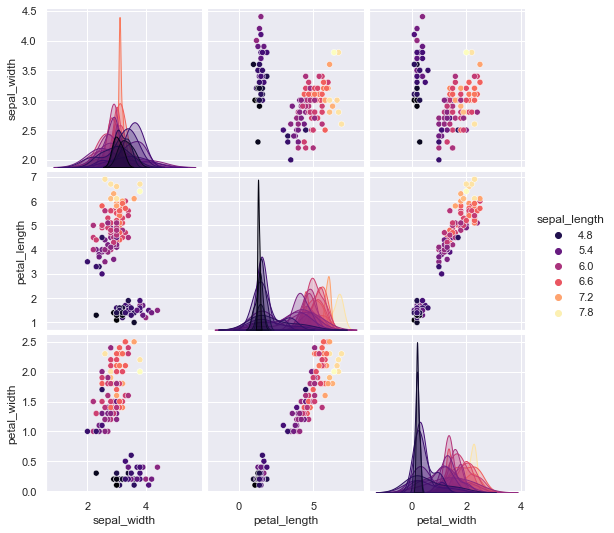

In [113]:
sns.pairplot(data=iris_df, hue="sepal_length", palette="magma")

# Plots

## sns.barplot

In [12]:
fig, ax = plt.subplots()
sns.barplot(data=iris_df,
            x='species',
            y='sepal_length',
            hue="species",
            # callable that maps vector -> scalar, optional : Statistical function to estimate within each categorical bin.
            estimator=np.mean,
            ci=95,             # float or “sd” or None,
            orient="v",         # “v” | “h”,
            color="#1CB3B1",  # main color, exclusive with palette color matplotlib color, optional
            palette='magma',
            saturation=0.75,
            # errcolor= # matplotlib color
            # errwidth= # float
            # capsize= # float
            dodge=True,
            )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'iris_df' is not defined

## sns.catplot(kind="strip")

In [ ]:
sns.catplot(kind="strip", data=iris_df,
            x="species",
            y="petal_width",
            hue="species",
            jitter=True,
            split=False)

## sns.catplot(kind="swarm")

In [ ]:
sns.catplot(kind="swarm", data=iris_df,
            x="species",
            y="petal_width",
            hue="species")

## sns.catplot(kind="box")

In [ ]:
sns.catplot(kind="box", data=iris_df,
            x="species",
            y="petal_width",
            hue="species",
            color='#EE67CF'  # main color
            )

## sns.catplot(kind="violin")

In [ ]:
sns.catplot(kind="violin", data=iris_df,
            x="species",
            y="petal_width",
            hue="species",
            inner="stick",
            split=False,
            palette="pastel")

## sns.catplot(kind="boxen")

In [ ]:
sns.catplot(kind="boxen", data=iris_df,
            x="species",
            y="sepal_width")

## sns.catplot(kind="bar")

In [ ]:
sns.catplot(kind="bar", data=iris_df,
            x="species",
            y="petal_width",
            hue="species")

## sns.catplot(kind="count")

In [ ]:
sns.catplot(kind="count", data=iris_df,
            x="sepal_length",
            )

## sns.catplot(kind="point")

In [ ]:
sns.catplot(kind="point", data=iris_df,
            x="petal_width",
            y="sepal_width",
            hue="species")

## sns.displot

In [ ]:
sns.displot(iris_df,
            x="petal_length",
            hue="species",
            # col="sex",                   # add additional plots col-wise
            # stat="density",              # normalize hist area
            stat="probability",           # normalise hist values
            common_norm=False,            # normalise each sub-hist independantly
            # bins=20,                     # set bin number
            # bins=[1, 2, 3, 4, 5, 6, 7]), # set bins
            binwidth=0.5,                 # set bin size
            # discrete=True,               # if data values are discrete
            # shrink=.8,                   # shrink bins width-display
            #element="step",              #
            # multiple="stack",            # dodge
            rug=True,                     # add rug
            # color="blue",              # main color
            )

# sns.distplot(data_df['sepal_width'])

In [ ]:
sns.displot(iris_df,
            x="petal_length", y="petal_width")

sns.displot(iris_df, hue="species",
            x="petal_length", y="petal_width",
            binwidth=(2, .5),
            cbar=True,
            )

## sns.displot(kind="kde")

In [ ]:
sns.displot(iris_df, kind="kde",
            hue="species",
            # multiple="stack",
            fill=True,
            bw_adjust=.5,      # adjust bandwidth
            # cut=0,            # clip kde plot curve
            x="petal_length",
            y="petal_width",
            # thresh=.2,
            # levels=0.2,        # levels=[.01, .05, .1, .8]
            rug=True,
            )

In [ ]:
sns.displot(iris_df, kind="kde",
            x="petal_length",
            y="petal_width")

In [ ]:
sns.displot(iris_df, kind="kde",
            x="sepal_length",
            y="petal_length",
            hue="species")

## sns.displot(kind="ecdf")

In [ ]:
sns.displot(iris_df, kind="ecdf",
            x="petal_length",
            hue="species",
            rug=True)

## sns.heatmap

In [ ]:
plt.figure()
sns.heatmap(iris_df.corr(),
            vmin=-1,
            vmax=1,
            annot=True,             # add cell values on cell
            linewidth=0.5,          # linewidth separating cells
            linecolor="k",          # color of lines separating cells
            cbar=True,              # add a colorbar
            square=True,            # enforce square cells
            # yticklabels=cols,      # list of names for col labels
            # xticklabels=cols,      # list of names for col labels
            annot_kws={'size': 20},
            cmap="BuPu",            # YlGnBu/ Blues / BuPu / Greens
            )

In [ ]:
plt.figure(figsize=(4, 5))

dependent_variable = "petal_length"

g = sns.heatmap(iris_df.corr()[[dependent_variable]].sort_values(by=dependent_variable),
                annot=True,
                cmap='coolwarm',
                vmin=-1,
                vmax=1)

## sns.histplot

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=iris_df,
             x="sepal_length",
             hue="species",
             # {“count”, “frequency”, “density”, “probability”}
             stat="count",
             # bins="auto",           # str, number, vector, or a pair of such values
             # binwidth=None,         # number or pair of numbers
             discrete=None,          # bool
             cumulative=False,       # bool
             common_bins=True,       # bool
             common_norm=True,       # bool
             multiple="layer",       # {“layer”, “dodge”, “stack”, “fill”}
             element="bars",         # {“bars”, “step”, “poly”}
             fill=True,              # bool
             shrink=1,               # number
             kde=False,              # bool
             pmax=None,              # number or None
             cbar=False,             # bool
             palette=None,           #
             color=None,             #
             legend=True,            # bool
             )

## sns.lineplot

In [ ]:
plt.figure()
sns.lineplot(data=iris_df,
             x='petal_length',
             y='petal_width',
             hue="species",
             style="species",
             markers=True,
             )

## sns.lmplot

In [ ]:
sns.lmplot(data=iris_df,
           x="petal_length", y="petal_width",
           hue="species",
           col="species",           # add other plots column-wise
           # col_wrap=2,              # wrap plots
           # row="sepal_length",      # add other plots row-wise
           # x_estimator=np.mean,     # choose aggregation
           x_jitter=.05,
           # order=2,                 # change the order of regression
           # ci=None,                 # enable confidence interval
           # robust=True,             # exclude outliers from regression
           # logistic=True,           # use logistic curve (usefull for binary data)
           # markers=["o", "x", "*"], # use different markers for hue
           # palette="Set1",          # change color palet
           #markers=["o", "x", "+"],
           scatter_kws={"s": 80,       # scatter kwargs
                        # "color":"red"
                        },
           # line_kws={'color': 'red'}   # line kwargs
           )
#

## sns.jointplot

In [ ]:
sns.jointplot(data=iris_df,
              x="petal_length",
              y="sepal_length",
              hue="species")

## sns.jointplot(kind="kde")

In [ ]:
sns.jointplot(data=iris_df, kind="kde",
              x="petal_length",
              y="petal_width",
              hue="species"
              )

## sns.pairplot

In [ ]:

sns.pairplot(data=iris_df,
             # plot-kind in cross cells : {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             kind="reg",
             # vars=,
             # x_vars=["sepal_length", "sepal_width", "petal_width"], # restrict variables on xaxis
             # y_vars=["sepal_length", "sepal_width", "sepal_width"], # restrict variables on yaxis
             hue="species",
             diag_kind="kde",            # plot-kind on diagonal cells : "auto", "hist", "kde", None
             height=1.5,                 # height of cell
             aspect=1,                   # width wrt heigth
             palette="Set2",
             corner=True,              # low-left-triangle plots only
             # plot_kws={'color':'green'}
             )  # .map_upper(sns.kdeplot, cmap="Blues_d")

## sns.regplot

In [ ]:
plt.figure()
sns.regplot(data=iris_df,
            x="sepal_width",
            y="sepal_length",
            order=1,      # change the order of regression, exclusive with order/logistic/robust/logx
            scatter=True,  # plot scatter
            fit_reg=True,  # plot regression line
            ci=100,        # confidence interval : None to hide
            # robust=True,   # exclude outliers from regression
            # x_jitter=.1   # jitter when x is discrete
            x_estimator=np.mean,  # add mean estimator
            # logx=True,     # use log regression, exclusive with order/logistic/robust/logx
            # logistic=False, # use logistic regression (for binary data), exclusive use with order/logistic/robust/logx
            )

## sns.relplot

In [ ]:

sns.relplot(
    data=tips_df,
    # kind="line", # None for scatter, line
    x="total_bill",
    y="tip",
    col="time",
    row="sex",
    hue="day",
    size="size",
    height=3,
    aspect=1,
    # style="species",
    # col_wrap=2,
    facet_kws=dict(sharex=False),
)

## sns.residplot

In [ ]:
plt.figure()
# compute regression and plot residuals
sns.residplot(data=iris_df,
              x="sepal_length",
              y="sepal_width",
              scatter_kws={"s": 80})

## sns.scatterplot

In [ ]:
plt.figure()
sns.scatterplot(data=iris_df,
                x='sepal_length',
                y='sepal_width',
                hue="species",
                style="species",
                size="petal_width",  # size of markers
                sizes=(10, 300),      # min and max markers sizes
                )

# Interactive iris : start here !

In [ ]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt

iris_df = sns.load_dataset("iris")

# all cols
iris_cols = list(iris_df.columns)
# all cols w None
iris_cols_ext = list(iris_cols)
iris_cols_ext.append(None)
# numerical features
iris_num_cols = list(iris_cols)
iris_num_cols.remove("species")
# numerical features w None
iris_num_cols_ext = list(iris_num_cols)
iris_num_cols_ext.append(None)

## sns.catplot(kind="count")

In [ ]:
@ipywidgets.interact
def plot(ys=iris_cols):
    sns.catplot(kind="count", data=iris_df,
                y=ys)

## sns.catplot(kind="boxplot")

In [ ]:
# stripplot plot : univariate counts
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="box", data=iris_df,
                x=x,
                y=y,
                hue=hue)

## sns.caplot(kind="boxen")

In [ ]:
# stripplot plot : univariate counts
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="boxen", data=iris_df,
                x=x,
                y=y, hue=hue)

## sns.caplot(kind="point")

In [ ]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="point", data=iris_df,
                x=x,
                y=y,
                hue=hue)

## sns.caplot(kind="violin")

In [ ]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols, col=iris_cols_ext):
    sns.catplot(kind="violin", data=iris_df,
                x=x,
                y=y,
                hue=hue,
                col=col,
                inner="stick",
                split=False,      # hue level only
                palette="pastel")

## sns.catplot(kind="strip")

In [ ]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="strip", data=iris_df,
                x=x,
                y=y,
                hue=hue,
                # jitter=True,
                dodge=True  # formerly "split"
                )

## sns.catplot(kind="swarm")

In [ ]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    # plt.figure()
    sns.catplot(kind="swarm", data=iris_df,
                x=x,
                y=y,
                hue=hue)

## sns.heatmap

In [ ]:
@ipywidgets.interact
def plot(cols=ipywidgets.SelectMultiple(options=iris_cols),
         annot=True,
         cbar=True,
         square=True):
    fig, ax = plt.subplots()
    cols = list(cols)
    if len(cols) == 0:
        cols = list(iris_cols)
    sns.heatmap(iris_df[cols].corr(),
                vmin=-1,
                vmax=1,
                annot=annot,
                linewidth=0.5,  # linewidth separating cells
                linecolor="k",  # color of lines separating cells
                cbar=cbar,    # add a colorbar
                square=square  # enforce square cells
                )
    plt.tight_layout()

In [ ]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable
    '''
    plt.figure(figsize=(8, 10))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable),
                    annot=True,
                    cmap='coolwarm',
                    vmin=-1,
                    vmax=1)
    return g

## sns.histplot

In [ ]:

numerical_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


@ipywidgets.interact
def plot(hue=iris_cols,
         x=iris_cols,
         stat=["count", "frequency", "density", "probability"]):
    fig, ax = plt.subplots()
    sns.histplot(
        data=iris_df,
        x=x,
        stat=stat,         # "count", "frequency", "density", "probability"
        # y=ys,
        hue=hue,
        discrete=False,
        cumulative=False,
        fill=False,
        kde=True,
        multiple="layer",   # {“layer”, “dodge”, “stack”, “fill”}
        element="bars",      # {"bars", "step", "poly"—
        cbar=True,
    )

## sns.pairplot 

In [ ]:

@ipywidgets.interact
def plot(hue=iris_cols_ext, diag_kind=["auto", "hist", "kde", None],
         kind=["scatter", "kde", "hist", "reg"],
         corner=False):
    sns.pairplot(data=iris_df,
                 # plot-kind in cross cells : {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                 kind=kind,
                 # vars=,
                 x_vars=iris_num_cols,  # restrict variables on xaxis
                 y_vars=iris_num_cols,  # restrict variables on yaxis
                 hue=hue,
                 # plot-kind on diagonal cells : "auto", "hist", "kde", None
                 diag_kind=diag_kind,
                 height=1.5,                               # height of cell
                 aspect=1,                               # width wrt heigth
                 palette="Set2",
                 corner=corner,    # low-left-triangle plots only : True/false
                 )

## sns.regplot

In [ ]:


import numpy as np


@ipywidgets.interact
def plot(x=iris_num_cols, y=iris_num_cols, fit_reg=True, scatter=True, x_estimator=[None, np.mean]):
    plt.figure()
    sns.regplot(data=iris_df,
                x=x, y=y,
                order=1,      # change the order of regression, exclusive with order/logistic/robust/logx
                scatter=scatter,  # plot scatter
                fit_reg=fit_reg,  # plot regression line
                ci=100,        # confidence interval : None to hide
                x_bins=None,     # number of x bins for plotting, int or None
                # robust=True,   # exclude outliers from regression
                # x_jitter=.1   # jitter when x is discrete
                # add mean estimator : None or callable(vector)->scalar
                x_estimator=x_estimator,
                # logx=True,     # use log regression, exclusive with order/logistic/robust/logx
                # logistic=False, # use logistic regression (for binary data), exclusive use with order/logistic/robust/logx
                )

# JointGrid

Grid for drawing a bivariate plot with marginal univariate plots.
Many plots can be drawn by using the figure-level interface jointplot(). Use this class directly when you need more flexibility.
```python
seaborn.JointGrid(*,
    x=None,
    y=None,
    data=None,
    height=6, 
    ratio=5, 
    space=0.2, 
    dropna=False,
    xlim=None, 
    ylim=None, 
    size=None,
    marginal_ticks=False, 
    hue=None, 
    palette=None, 
    hue_order=None,
    hue_norm=None)
```

JointGrid methods: 
 - plot(self, joint_func, marginal_func, **kwargs) :Draw the plot by passing functions for joint and marginal axes.
 - plot_joint(self, func, **kwargs) : Draw a bivariate plot on the joint axes of the grid. 
 - plot_marginals(self, func, **kwargs) : Draw univariate plots on each marginal axes.
 - savefig(self, *args, **kwargs) : Save the figure using a “tight” bounding box by default.
 - set_axis_labels(self[, xlabel, ylabel]) : Set axis labels on the bivariate axes.

Initialize the grid : 
sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
The simplest plotting method, JointGrid.plot() accepts a pair of functions (one for the joint axes and one for both marginal axes):
g.plot(sns.scatterplot, sns.histplot)
g.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)
g = sns.JointGrid()

You can then plot by accessing the ax_joint, ax_marg_x, and ax_marg_y attributes, which are matplotlib.axes.Axes objects:

g = sns.JointGrid()
x, y = penguins["bill_length_mm"], penguins["bill_depth_mm"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

g.plot(sns.regplot, sns.boxplot)
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
g.plot(sns.scatterplot, sns.histplot)

The figure will always be square (unless you resize it at the matplotlib layer), but its overall size and layout are configurable. The size is controlled by the height parameter. The relative ratio between the joint and marginal axes is controlled by ratio, and the amount of space between the plots is controlled by space:

sns.JointGrid(height=4, ratio=2, space=.05)

sns.JointGrid(marginal_ticks=True)
sns.JointGrid(xlim=(-2, 5), ylim=(0, 10))

# PairGrid

Pair grid : use when pairplot is not enough

PairGrid methods :
 - Map,
 - map_diag :
 - map_lower
 - map_offdiag
 - map_upper
 - savefig
 - set
 - tight_layout
 - add_legend()
 
Possible plot functions : 
 - plt.hist
 - plt.scatter
 - sns.histplot
 - sns.kdeplot
 
Signature : 
 ```python
seaborn.PairGrid(
    data, *,
    hue=None,
    hue_order=None,
    palette=None,
    hue_kws=None,
    vars=None,       # subset of vars
    x_vars=None,     # list of vars to plot on xaxis
    y_vars=None,     # list of vars to plot on yaxis
    corner=False,    # bool : If True, don’t add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.
    diag_sharey=True,
    height=2.5,
    aspect=1,
    layout_pad=0.5,
    despine=True,
    dropna=False,
    size=None
)
```


In [ ]:
# creation of PairGrid
iris_pg = sns.PairGrid(iris, hue=”species”, vars=list_of_cols)

# map function to plots
iris_pg.map(plt.scatter)
# map function to diagonal plots
iris_pg.map_diag(plt.hist)
# don’t use the hue on the diagonal
iris_pg.map_diag(sns.histplot, hue=None, color=".3")
iris_pg.map_diag(sns.kdeplot, lw=3, legend=False)
# map function to off-diagonal plots
iris_pg.map_offdiag(plt.scatter)
iris_pg.map_offdiag(sns.scatterplot, size=iris["sepal_length"])
# map function to upper triangle plots
iris_pg.map_upper(plt.scatter)
iris_pg.map_upper(
    plt.scatter,
    x_vars=[“petal_length”, “petal_width”],
    y_vars=[“sepal_length”, “sepal_width”],
)
# map function to lower triangle plots
iris_pg.map_lower(sns.kdeplot)

# add legend
iris_pg.add_legend()
iris_pg.add_legend(title="", adjust_subtitles=True)

# set
iris_pg.set(ylim=(-1, 11), yticks=[0, 5, 10])

Add corr-coefs to plots

In [ ]:
from scipy import stats

mean = np.zeros(3)
cov = np.random.uniform(.2, .4, (3, 3))
cov += cov.T
cov[np.diag_indices(3)] = 1
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=["X", "Y", "Z"])


def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)


g = sns.PairGrid(df, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)

# Figure-level plots vs axes-level plots

The following are figure level, that defaults to specific 
- displot :default to scatterplot
- relplot : default to histplot
- catplot : default to stripplot
The figure-level functions return a FacetGrid instance
They accept a “col” to facet and a “kind” arg
 
The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into.
The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go.

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.


# Other figure-level plots : PairGrid vs FacetGrid 
2 other functions : jointplot and pairplot
Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, jointplot() and pairplot(), employ multiple kinds of plots from different modules to represent mulitple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: JointGrid and PairGrid, respectively.
 
It’s important to understand the differences between a FacetGrid and a PairGrid. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship
 
 

# Palette widgets

Seaborn's palettes are a great way to deal with color of your plots. But browsing the palette and picking the right is not a simple task : it is a try-error process, replotting the same plot over again changin the palette.

Until now.

Seaborn exposes 5 widgets to play around with color palettes : 
https://seaborn.pydata.org/api.html#palette-widgets

 - seaborn.choose_colorbrewer_palette(data_type, as_cmap=False) : Select a palette from the ColorBrewer set. These palettes are built into matplotlib and can be used by name in many seaborn functions, or by passing the object returned by this function.
 ‘sequential’, ‘diverging’, ‘qualitative’
 

In [ ]:
https://pypi.org/project/jupyter-to-medium/

In [16]:
%matplotlib inline

In [17]:
import seaborn as sns

In [22]:
sns.choose_light_palette('husl') 
sns.choose_light_palette('hls')
sns.choose_light_palette('rgb')
sns.choose_dark_palette('husl')
sns.choose_dark_palette('hls')
sns.choose_dark_palette('rgb')
sns.choose_cubehelix_palette()
sns.choose_diverging_palette()
sns.choose_colorbrewer_palette("sequential") 
sns.choose_colorbrewer_palette("diverging") 
sns.choose_colorbrewer_palette("qualitative");


interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0), FloatSlider(value=0.5, description='l'…

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0), FloatSlider(value=0.5, description='g'…

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0), FloatSlider(value=0.5, description='l'…

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0), FloatSlider(value=0.5, description='g'…

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…